In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from sklearn.utils import shuffle

import keras


sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

In [4]:
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")

#### Here, we are just setting the Y and X from the training dataset. 

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

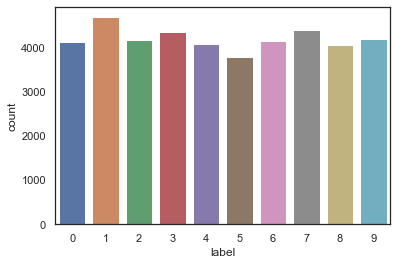

In [5]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

sns.countplot(Y_train)

Y_train.value_counts()

#### Performing GrayScale Normalization

In [6]:
X_train = X_train / 255.0
test = test / 255.0

In [7]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [8]:
Y_train = to_categorical(Y_train, num_classes = 10)

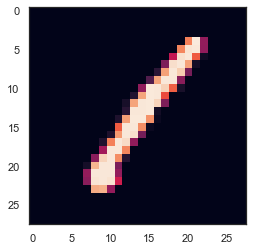

In [9]:
g = plt.imshow(X_train[0][:,:,0])

In [10]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=42)

### Building my own model + Data Augmentation

#### Data Augmentation is the process of changing or adding noise to image

In [11]:
# A helper function to create augmentation of images
def augmentImages(images, multiple):
    gen = ImageDataGenerator()
    newImages = []
    for _ in range(multiple):
        for image in images:
            transformedImage = gen.apply_transform(image, {'brightness': np.random.uniform(low = 0.5, high=0.99),
                                                            'tx': np.random.random_integers(2),
                                                            'ty': np.random.random_integers(2)})
            newImages.append(transformedImage)
    newImages = np.array(newImages)
    return newImages

### Deep Learning Model

#### For this project I'm going to experiment with different model to see 

In [12]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (2,2), activation='relu'))
model.add(Conv2D(128,(2,2), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [13]:
model2 = Sequential()
model2.add(Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model2.add(Conv2D(32, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.3))

model2.add(Conv2D(64, (2,2), activation='relu'))
model2.add(Conv2D(128,(2,2), activation ='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.3))

model2.add(Flatten())
model2.add(Dense(100, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(10, activation='softmax'))

In [14]:
model3 = Sequential()
model3.add(Conv2D(8, (2,2), activation='relu', input_shape=(28,28,1)))
model3.add(Conv2D(16, (2,2), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.3))

model3.add(Conv2D(32, (2,2), activation='relu'))
model3.add(Conv2D(64,(2,2), activation ='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.3))

model3.add(Flatten())
model3.add(Dense(512, activation='relu'))
model3.add(Dense(10, activation='softmax'))

In [15]:
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience=2)

model.compile(optimizer=keras.optimizers.SGD(1e-3),
              loss = 'categorical_crossentropy',
              metrics=['accuracy']
             )

model2.compile(optimizer=keras.optimizers.SGD(1e-3),
              loss = 'categorical_crossentropy',
              metrics=['accuracy']
             )

model3.compile(optimizer=keras.optimizers.SGD(1e-3),
              loss = 'categorical_crossentropy',
              metrics=['accuracy']
             )

In [16]:
newNumbers = augmentImages([X_train[0]],1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: This function is deprecated. Please call randint(1, 2 + 1) instead
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: This function is deprecated. Please call randint(1, 2 + 1) instead
  if __name__ == '__main__':


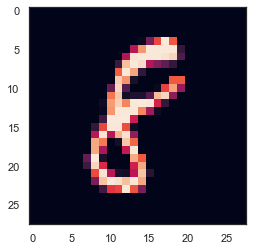

In [17]:
plt.imshow(newNumbers.reshape(28,28))

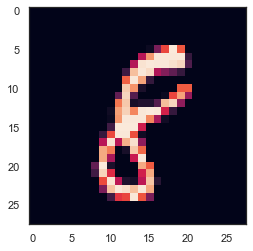

In [18]:
plt.imshow(X_train[0].reshape(28,28))

In [19]:
augmentPic = augmentImages(X_train,1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: This function is deprecated. Please call randint(1, 2 + 1) instead
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: This function is deprecated. Please call randint(1, 2 + 1) instead
  if __name__ == '__main__':


In [20]:
x_train, y_train = shuffle(X_train, Y_train)

In [21]:
model.fit(x_train, y_train, batch_size = 32, epochs=50, validation_split=0.4, callbacks=[early_stopping_monitor])


Train on 22680 samples, validate on 15120 samples
Epoch 1/50
22680/22680 [==============================] - 27s 1ms/step - loss: 2.2840 - accuracy: 0.1959 - val_loss: 2.2622 - val_accuracy: 0.3759
Epoch 2/50
22680/22680 [==============================] - 25s 1ms/step - loss: 2.2070 - accuracy: 0.3492 - val_loss: 2.0838 - val_accuracy: 0.4870
Epoch 3/50
22680/22680 [==============================] - 25s 1ms/step - loss: 1.5286 - accuracy: 0.5649 - val_loss: 0.7957 - val_accuracy: 0.7854
Epoch 4/50
22680/22680 [==============================] - 26s 1ms/step - loss: 0.8027 - accuracy: 0.7347 - val_loss: 0.5310 - val_accuracy: 0.8442
Epoch 5/50
22680/22680 [==============================] - 26s 1ms/step - loss: 0.6658 - accuracy: 0.7831 - val_loss: 0.4653 - val_accuracy: 0.8675
Epoch 6/50
22680/22680 [==============================] - 26s 1ms/step - loss: 0.5869 - accuracy: 0.8109 - val_loss: 0.4316 - val_accuracy: 0.8706
Epoch 7/50
22680/22680 [==============================] - 26s 1ms/s

In [22]:
model2.fit(x_train, y_train, batch_size = 32, epochs=50, validation_split=0.4, callbacks=[early_stopping_monitor])

Train on 22680 samples, validate on 15120 samples
Epoch 1/50
22680/22680 [==============================] - 28s 1ms/step - loss: 2.3028 - accuracy: 0.1141 - val_loss: 2.3010 - val_accuracy: 0.1120
Epoch 2/50
22680/22680 [==============================] - 28s 1ms/step - loss: 2.3006 - accuracy: 0.1126 - val_loss: 2.2987 - val_accuracy: 0.1119
Epoch 3/50
22680/22680 [==============================] - 29s 1ms/step - loss: 2.2983 - accuracy: 0.1148 - val_loss: 2.2960 - val_accuracy: 0.1119
Epoch 4/50
22680/22680 [==============================] - 28s 1ms/step - loss: 2.2956 - accuracy: 0.1264 - val_loss: 2.2925 - val_accuracy: 0.1128
Epoch 5/50
22680/22680 [==============================] - 28s 1ms/step - loss: 2.2919 - accuracy: 0.1474 - val_loss: 2.2881 - val_accuracy: 0.1327
Epoch 6/50
22680/22680 [==============================] - 29s 1ms/step - loss: 2.2869 - accuracy: 0.1887 - val_loss: 2.2820 - val_accuracy: 0.1969
Epoch 7/50
22680/22680 [==============================] - 29s 1ms/st

In [24]:
model3.fit(x_train, y_train, batch_size = 32, epochs=50, validation_split=0.4, callbacks=[early_stopping_monitor])

Train on 22680 samples, validate on 15120 samples
Epoch 1/50
22680/22680 [==============================] - 15s 656us/step - loss: 2.2621 - accuracy: 0.1668 - val_loss: 2.2171 - val_accuracy: 0.4317
Epoch 2/50
22680/22680 [==============================] - 14s 619us/step - loss: 2.0587 - accuracy: 0.4070 - val_loss: 1.7114 - val_accuracy: 0.6707
Epoch 3/50
22680/22680 [==============================] - 14s 613us/step - loss: 1.1794 - accuracy: 0.6487 - val_loss: 0.6723 - val_accuracy: 0.8095
Epoch 4/50
22680/22680 [==============================] - 14s 606us/step - loss: 0.7849 - accuracy: 0.7381 - val_loss: 0.5193 - val_accuracy: 0.8465
Epoch 5/50
22680/22680 [==============================] - 14s 609us/step - loss: 0.6679 - accuracy: 0.7794 - val_loss: 0.4738 - val_accuracy: 0.8519
Epoch 6/50
22680/22680 [==============================] - 13s 594us/step - loss: 0.5968 - accuracy: 0.8058 - val_loss: 0.4325 - val_accuracy: 0.8698
Epoch 7/50
22680/22680 [==============================] 

In [25]:
score = model.evaluate(X_val, Y_val, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy', score[1])

Test loss: 0.10766396850702309
Test accuracy 0.9671428799629211


In [26]:
score = model2.evaluate(X_val, Y_val, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy', score[1])

Test loss: 0.10610142052705798
Test accuracy 0.9661904573440552


In [27]:
score = model3.evaluate(X_val, Y_val, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy', score[1])

Test loss: 0.12269145318440029
Test accuracy 0.9611904621124268
